# Exercise 4

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np 

In [4]:
df = pd.read_csv ('EFIplus_medit.zip',compression="zip", sep= ";")

In [5]:
# Convert presence/absence of Brown Trout to binary (if not already)
df["Salmo trutta fario"] = df["Salmo trutta fario"].astype(int)


### Exploring Mean Annual Temperature for Brown Trout Catchment

C:\Users\Rayza\AppData\Local\Temp\ipykernel_34280\604052433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Salmo trutta fario"], y=df["temp_ann"], palette=["#ffcba4", "#f26b8a"])


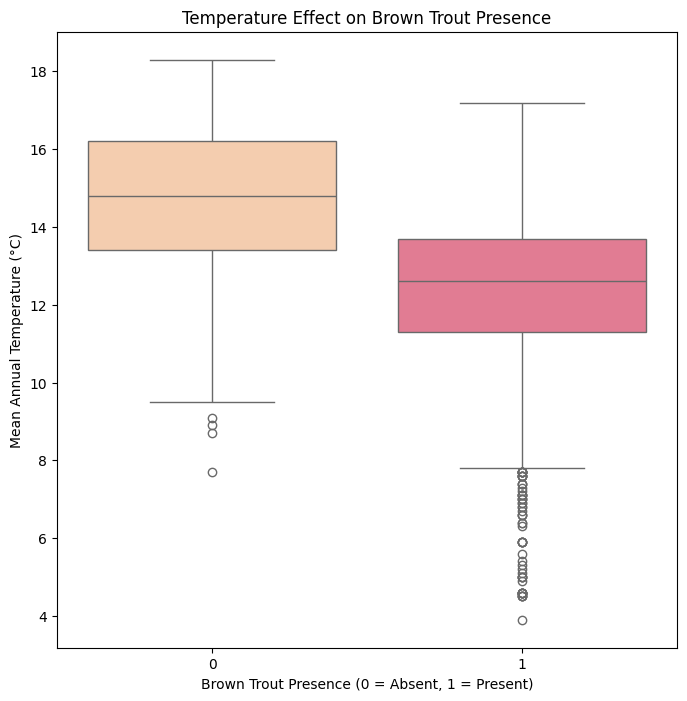

In [13]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=df["Salmo trutta fario"], y=df["temp_ann"], palette=["#ffcba4", "#f26b8a"])
plt.xlabel("Brown Trout Presence (0 = Absent, 1 = Present)")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Temperature Effect on Brown Trout Presence")
plt.show()

C:\Users\Rayza\AppData\Local\Temp\ipykernel_34280\2665076419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df["Salmo trutta fario"], y=df["temp_ann"], jitter=True, alpha=0.3,


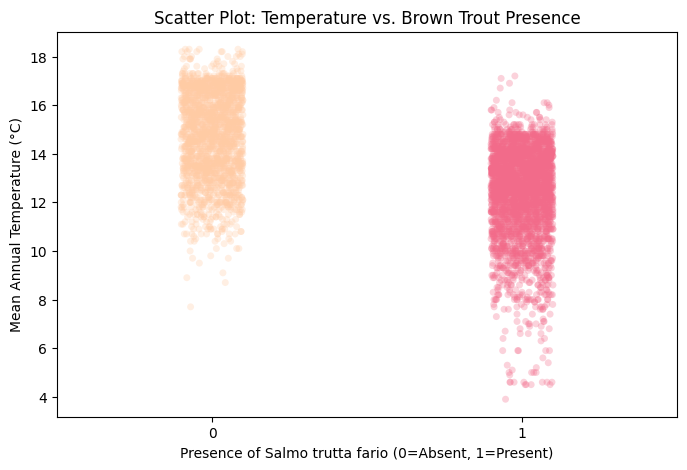

In [14]:
plt.figure(figsize=(8, 5))
sns.stripplot(x=df["Salmo trutta fario"], y=df["temp_ann"], jitter=True, alpha=0.3, 
            palette=["#ffcba4", "#f26b8a"])
plt.xlabel("Presence of Salmo trutta fario (0=Absent, 1=Present)")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Scatter Plot: Temperature vs. Brown Trout Presence")
plt.show()

### Exploring Mean Annual Temperature for Brown Trout Catchment: Minho and Tagus 

C:\Users\Rayza\AppData\Local\Temp\ipykernel_34280\2672204801.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_catchment["Salmo trutta fario"], y=df_catchment["temp_ann"],


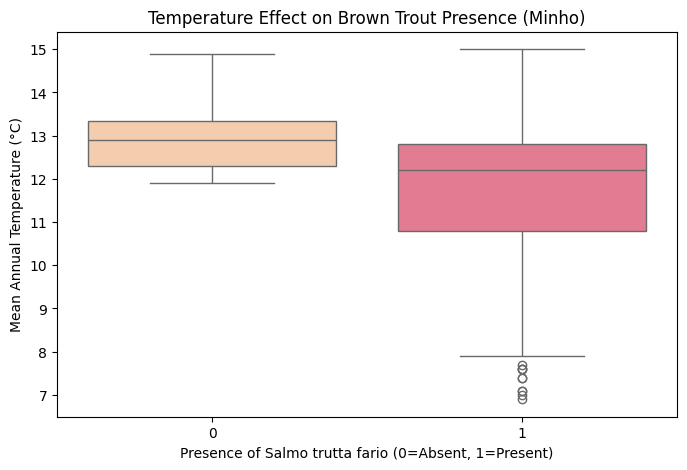

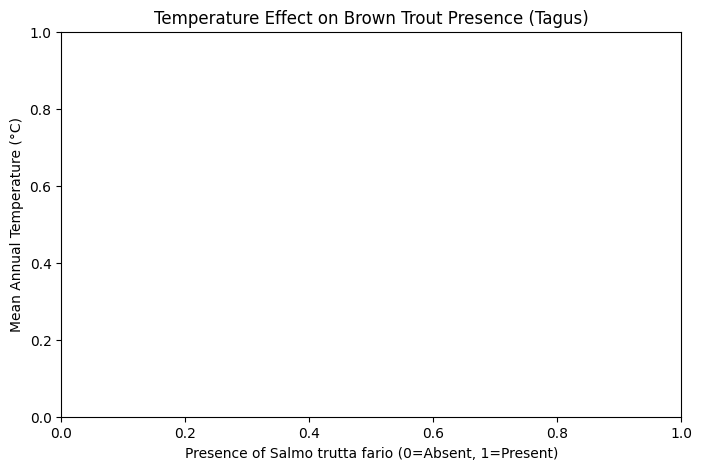

In [15]:
#Separate Analysis for Minho and Tagus Catchments ----
for catchment in ["Minho", "Tagus"]:
    df_catchment = df[df["Catchment_name"] == catchment]
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_catchment["Salmo trutta fario"], y=df_catchment["temp_ann"], 
                palette=["#ffcba4", "#f26b8a"])  
    plt.xlabel("Presence of Salmo trutta fario (0=Absent, 1=Present)")
    plt.ylabel("Mean Annual Temperature (°C)")
    plt.title(f"Temperature Effect on Brown Trout Presence ({catchment})")
    plt.show()

C:\Users\Rayza\AppData\Local\Temp\ipykernel_34280\1226087666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_catchment["Salmo trutta fario"], y=df_catchment["temp_ann"], jitter=True, alpha=0.6,
C:\Users\Rayza\AppData\Local\Temp\ipykernel_34280\1226087666.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x=df_catchment["Salmo trutta fario"], y=df_catchment["temp_ann"], jitter=True, alpha=0.6,


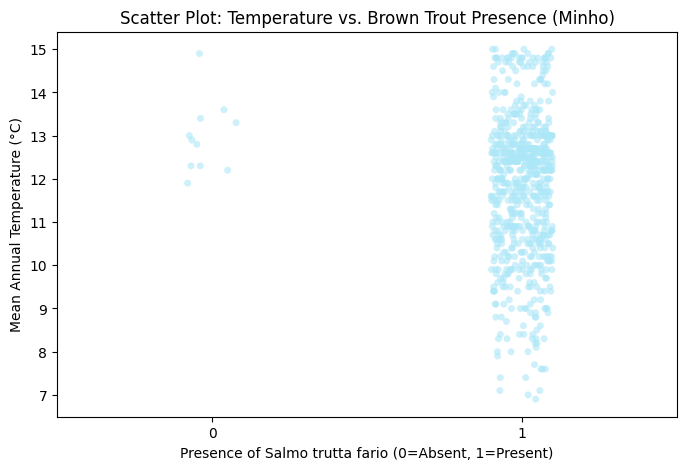

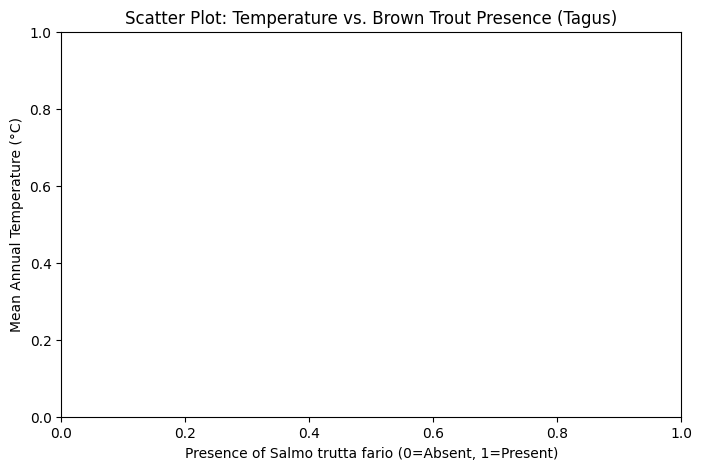

In [16]:
for catchment in ["Minho", "Tagus"]:
    df_catchment = df[df["Catchment_name"] == catchment]
    plt.figure(figsize=(8, 5))
    sns.stripplot(x=df_catchment["Salmo trutta fario"], y=df_catchment["temp_ann"], jitter=True, alpha=0.6, 
                    palette=["#ace7f8"])
    plt.xlabel("Presence of Salmo trutta fario (0=Absent, 1=Present)")
    plt.ylabel("Mean Annual Temperature (°C)")
    plt.title(f"Scatter Plot: Temperature vs. Brown Trout Presence ({catchment})")
    plt.show()

### Testing if Actual_river_slop is drawn from a Normal Distribution

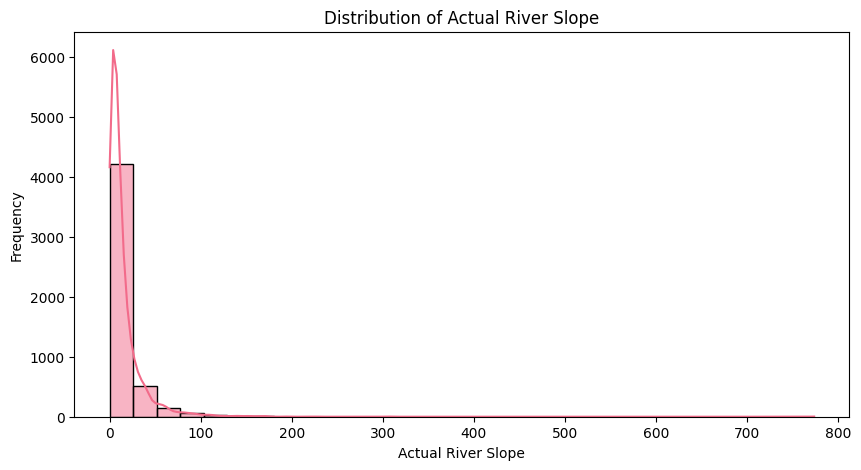

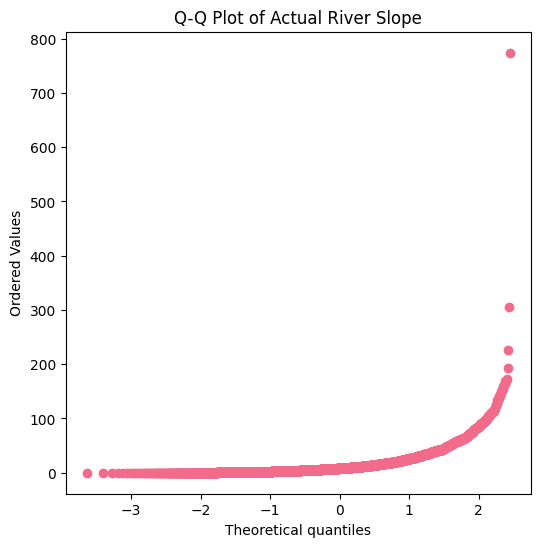

In [17]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Actual_river_slope"], bins=30, kde=True, color="#f26b8a")
plt.xlabel("Actual River Slope")
plt.ylabel("Frequency")
plt.title("Distribution of Actual River Slope")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(df["Actual_river_slope"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Actual River Slope")
plt.gca().get_lines()[0].set_color("#f26b8a")
plt.show()


### Testing if the mean from 100 samples (2000 observations) are drawn from a normal distribution

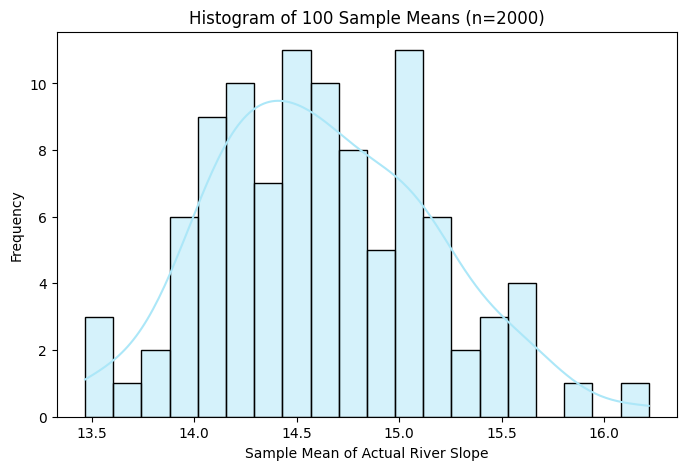

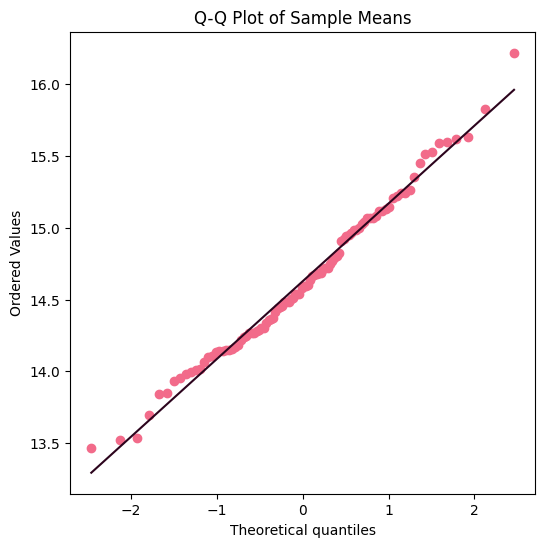

In [18]:
# Bootstrapping: Sampling 100 Means from 2000 Observations ----
num_samples = 100
sample_size = 2000
sample_means = []

for _ in range(num_samples):
    sample = df["Actual_river_slope"].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Convert to numpy array for further analysis
sample_means = np.array(sample_means)

#Plot Histogram of Sample Means
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True, bins=20, color="#ace7f8")
plt.xlabel("Sample Mean of Actual River Slope")
plt.ylabel("Frequency")
plt.title("Histogram of 100 Sample Means (n=2000)")
plt.show()

# Q-Q Plot for Normality Check 
plt.figure(figsize=(6, 6))
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.gca().get_lines()[1].set_color("#2c041d")  # Maroon reference line
plt.gca().get_lines()[0].set_color("#f26b8a")  # Pink scatter points
plt.show()

In [19]:
# Statistical Normality Test (Shapiro-Wilk)
shapiro_test = stats.shapiro(sample_means)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("The sample means appear to be normally distributed (fail to reject H0).")
else:
    print("The sample means do NOT follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9876, p-value: 0.4757
The sample means appear to be normally distributed (fail to reject H0).
